In [1]:
from diffusers import DiffusionPipeline
import torch

cache_dir='cache_dir'

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
num_gpus = torch.cuda.device_count()

if num_gpus > 0:
    print(f"GPUs available: {num_gpus}")
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")
else:
    print("There is no GPU available. Using CPU")

GPUs available: 1
GPU 0: NVIDIA RTX A4000


In [3]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", 
    torch_dtype=torch.float16, 
    use_safetensors=True, 
    variant="fp16",
    cache_dir=cache_dir
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
prompt = "a majestic programmer in a tech room with tons of screens"
images = pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

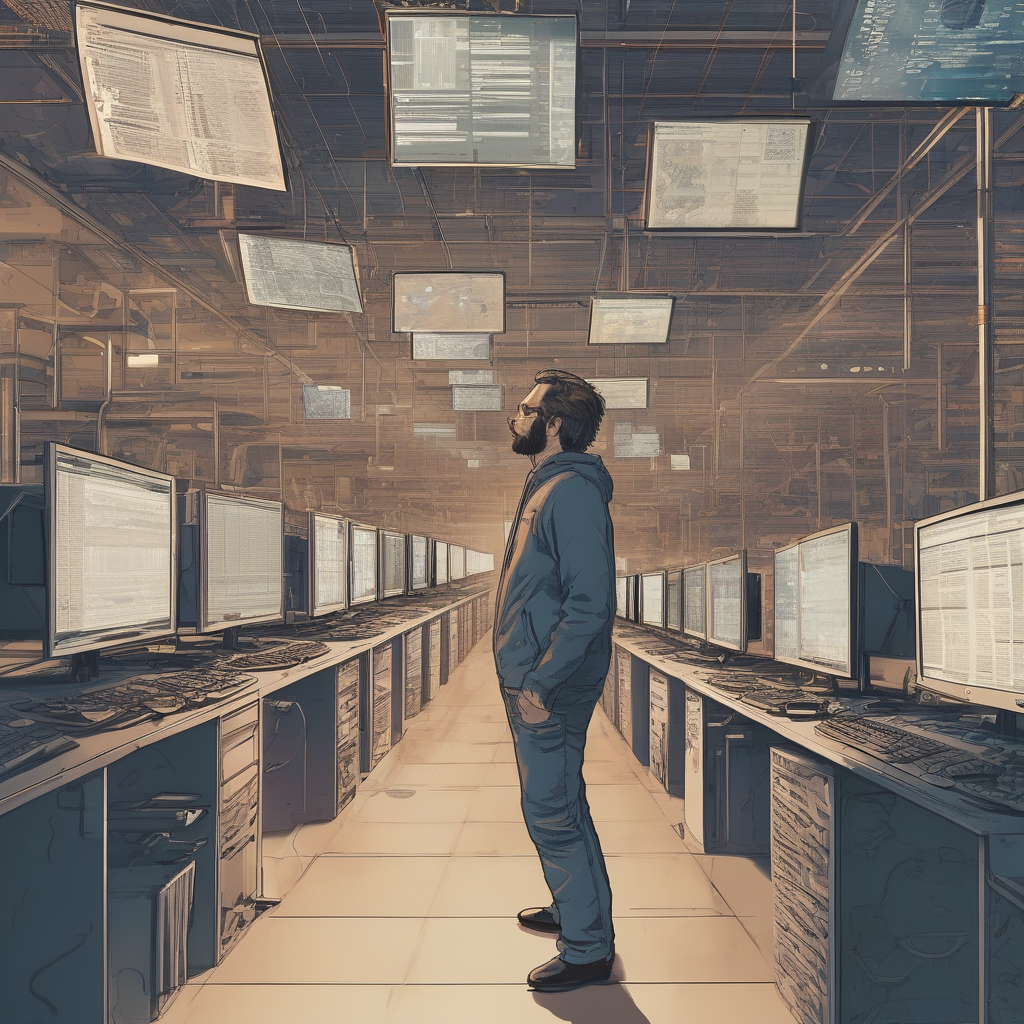

In [5]:
images.show()

In [6]:
images.save('images/programmer.png')